## Problem Statement

An education company named X Education sells online courses to industry professionals. The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. 

Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

## Business Goal

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. 

The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. 

The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Step 1: Inspecting the Dataframe

In [1]:
# Suppressing Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [3]:
# Importing the Leads.csv dataset

leads = pd.read_csv('Leads.csv')

# Checking the data top 5 records.
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Checking total rows and columns count
leads.shape

(9240, 37)

In [5]:
# Checking info on dataframe.
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Step 2: Data Preparation

### 2.1 Checking for duplicate data and remediation

In [7]:
# Check for duplicate data in the dataset

leads[leads.duplicated(keep=False)]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


_**There are no Duplicate values in the dataset**_

In [8]:
# Replacing 'Select' values in the dataset as missing values

leads = leads.replace('Select', np.nan)

### 2.2 Check for missing (NaN) values in the dataset and its remediation

In [9]:
# Percentage of missing values for each variables

round(100*(leads.isnull().sum()/len(leads.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

### Missing Values Treatment

### 2.2.1 Drop out the variables having more than 40% of missing values

In [10]:
cols = leads.columns

for i in cols:
    if round(100*(leads[i].isnull().sum()/len(leads.index)),2) >= 40:
        leads.drop(i, axis=1, inplace=True)

# Checking Percentage of missing values again

round(100*(leads.isnull().sum()/len(leads.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

### 2.2.2 Checking for each variables one by one having less than 40% of missing values

In [11]:
# Checking value counts for the Country column 

leads['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Nigeria                    4
Canada                     4
South Africa               4
Kuwait                     4
Germany                    4
Sweden                     3
Netherlands                2
Ghana                      2
Belgium                    2
Asia/Pacific Region        2
Bangladesh                 2
Uganda                     2
Italy                      2
China                      2
Philippines                2
Sri Lanka                  1
Denmark                    1
Kenya                      1
Tanzania                   1
Indonesia                  1
Liberia       

In [12]:
# Checking percentage of 'India' in the Country column
round(100*(sum(leads['Country']=='India')/len(leads.index)),2)

70.26

In [13]:
# Imputing the missing values in the Country column with 'India'
leads['Country'] = leads['Country'].replace(np.nan,'India')

In [14]:
# Checking percentage of 'India' in the Country column again
round(100*(sum(leads['Country']=='India')/len(leads.index)),2)

96.89

In [15]:
# As 'India' constitutes nearly 97% of the values in the Country column after imputation, this column can be dropped from our analysis.

leads.drop(['Country'], axis=1, inplace=True)

In [16]:
# Checking value counts for the Specialization column 

leads['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [17]:
# The missing values here could be due to the customers being students
# Therefore, replacing missing values as 'Not Mentioned'

leads['Specialization'] = leads['Specialization'].replace(np.nan,'Not Mentioned')

In [18]:
# Checking value counts for the 'What is your current occupation' column 

leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [19]:
# Checking percentage of 'Unemployed' in the 'What is your current occupation' column
round(100*(sum(leads['What is your current occupation']=='Unemployed')/len(leads.index)),2)

60.61

In [20]:
# Imputing the missing values with 'Unemployed'

leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan,'Unemployed')

In [21]:
# Checking percentage of 'Unemployed' again
round(100*(sum(leads['What is your current occupation']=='Unemployed')/len(leads.index)),2)

89.72

In [22]:
# Checking value counts for the 'What matters most to you in choosing a course' column 

leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [23]:
# Imputing the missing values with 'Better Career Prospects'

leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

In [24]:
# Checking percentage of 'Better Career Prospects' in 'What matters most to you in choosing a course' column
round(100*(sum(leads['What matters most to you in choosing a course']=='Better Career Prospects')/len(leads.index)),2)

99.97

In [25]:
# As 'Better Career Prospects' constitutes 99.97% of the values, this column can be dropped from our analysis.

leads.drop(['What matters most to you in choosing a course'], axis=1, inplace=True)

In [26]:
# Checking value counts for the 'Tags' column 

leads['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [27]:
# Replacing missing values as 'Not Mentioned'

leads['Tags'] = leads['Tags'].replace(np.nan,'Not Mentioned')

In [28]:
# Grouping together low frequency categories as 'Other_Tags' 

leads['Tags'] = leads['Tags'].replace(['switched off','Busy','Lost to EINS','Not doing further education','Interested  in full time MBA','Graduation in progress','invalid number','Diploma holder (Not Eligible)','wrong number given','opp hangup','number not provided','in touch with EINS','Lost to Others','Still Thinking','Want to take admission but has financial problems','In confusion whether part time or DLP','Interested in Next batch','Lateral student','University not recognized','Shall take in the next coming month','Recognition issue (DEC approval)'],'Other_Tags')

In [29]:
# Checking value counts for the 'City' column 

leads['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [30]:
# Checking percentage of 'Mumbai' in City column
round(100*(sum(leads['City']=='Mumbai')/len(leads.index)),2)

34.87

In [31]:
# Imputing missing values as 'Mumbai'

leads['City'] = leads['City'].replace(np.nan,'Mumbai')

In [32]:
# Checking value counts for the 'Lead Source' column 

leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
NC_EDM                  1
welearnblog_Home        1
youtubechannel          1
WeLearn                 1
testone                 1
blog                    1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

In [33]:
# Here 'Google'/'google' appears in two different cases. Therefore converting all values to uppercase 'Google'
# Also Imputing missing values with 'Google'

leads['Lead Source'] = leads['Lead Source'].replace('google','Google')
leads['Lead Source'] = leads['Lead Source'].replace(np.nan,'Google')

In [34]:
# Checking percentage of 'Google' in 'Lead Source' column
round(100*(sum(leads['Lead Source']=='Google')/len(leads.index)),2)

31.48

In [35]:
# Grouping the categories 'Facebook' and 'Social Media' together as 'Social Media'
# Grouping together low frequency categories as 'Other_Sources'  

leads['Lead Source'] = leads['Lead Source'].replace(['Facebook','Social Media'],'Social Media')
leads['Lead Source'] = leads['Lead Source'].replace(['bing','Click2call','Live Chat','Press_Release','WeLearn','testone','NC_EDM','blog','youtubechannel','welearnblog_Home','Pay per Click Ads'],'Other_Sources')

In [36]:
# Checking value counts for the 'TotalVisits' column 

leads['TotalVisits'].value_counts(dropna=False)

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
NaN       137
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
27.0        5
25.0        5
24.0        5
22.0        3
26.0        2
29.0        2
28.0        2
115.0       1
54.0        1
43.0        1
30.0        1
32.0        1
74.0        1
251.0       1
41.0        1
141.0       1
42.0        1
55.0        1
Name: TotalVisits, dtype: int64

In [37]:
# Median of 'TotalVisits' column

leads['TotalVisits'].median()

3.0

In [38]:
# Imputing missing values with the median value of '3.0'
leads['TotalVisits'] = leads['TotalVisits'].replace(np.nan, leads['TotalVisits'].median())

In [39]:
# Checking value counts for the 'Page Views Per Visit' column 

leads['Page Views Per Visit'].value_counts(dropna=False)

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
1.45       1
1.64       1
1.21       1
2.14       1
3.83       1
Name: Page Views Per Visit, Length: 115, dtype: int64

In [40]:
# Median of 'Page Views Per Visit' column

leads['Page Views Per Visit'].median()

2.0

In [41]:
# Imputing missing values with the median value of '2.0'
leads['Page Views Per Visit'] = leads['Page Views Per Visit'].replace(np.nan, leads['Page Views Per Visit'].median())

In [42]:
# Checking value counts for the 'Last Activity' column 

leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [43]:
# There is no information about the Last Activity of certain customers. 
# Therefore, replacing missing values as 'No Information'

leads['Last Activity'] = leads['Last Activity'].replace(np.nan, 'No Information')

In [44]:
# Grouping together low frequency categories as 'Other_Activity' 

leads['Last Activity'] = leads['Last Activity'].replace(['No Information','Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront','View in browser link Clicked','Email Received','Email Marked Spam','Resubscribed to emails','Visited Booth in Tradeshow'], 'Other_Activity')

In [45]:
# Checking Percentage of missing values again

round(100*(leads.isnull().sum()/len(leads.index)),2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses  

### Finally now we do not have any variables with missing values

### 2.3 Handling Imbalanced Data i.e. one value in majority and other one in minority

In [46]:
leads['Do Not Email'].value_counts(dropna=False)

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [47]:
leads['Do Not Call'].value_counts(dropna=False)

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [48]:
leads['Search'].value_counts(dropna=False)

No     9226
Yes      14
Name: Search, dtype: int64

In [49]:
leads['Magazine'].value_counts(dropna=False)

No    9240
Name: Magazine, dtype: int64

In [50]:
leads['Newspaper Article'].value_counts(dropna=False)

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [51]:
leads['X Education Forums'].value_counts(dropna=False)

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [52]:
leads['Newspaper'].value_counts(dropna=False)

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [53]:
leads['Digital Advertisement'].value_counts(dropna=False)

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [54]:
leads['Through Recommendations'].value_counts(dropna=False)

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [55]:
leads['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [56]:
leads['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [57]:
leads['Get updates on DM Content'].value_counts(dropna=False)

No    9240
Name: Get updates on DM Content, dtype: int64

In [58]:
leads['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [59]:
leads['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

#### As an observation from above following variables contain highly imbalanced values and as a remediation these variables should be dropped off from the dataset:
Do Not Call
Search                                      
Magazine                                   
Newspaper Article                           
X Education Forums                         
Newspaper                                  
Digital Advertisement                       
Through Recommendations                    
Receive More Updates About Our Courses  
Update me on Supply Chain Content       
Get updates on DM Content   
I agree to pay the amount through cheque

In [60]:
# Dropping off the above stated columns from the dataframe
leads = leads.drop(['Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'], axis=1)                       

### 2.4 Dropping of the insignificant columns

In [61]:
# Dropping the additional columns 'Prospect ID' and 'Lead Number' as these columns data are just the sequence nos. that adds no significance to calculations 
leads = leads.drop(['Prospect ID','Lead Number'], axis=1)                       

In [62]:
leads.shape

(9240, 14)

In [63]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  Tags                                    9240 non-null   obje

In [64]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not Mentioned,Unemployed,Interested in other courses,Mumbai,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not Mentioned,Unemployed,Ringing,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Other_Activity,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not Mentioned,Unemployed,Will revert after reading the email,Mumbai,No,Modified


### 2.5 Handling Outlier Data

In [65]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
leads.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440
std,0.486714,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
90%,1.000000,7.000000,1380.000000,5.000000
95%,1.000000,10.000000,1562.000000,6.000000
99%,1.000000,17.000000,1840.610000,9.000000


**It can be seen that outliers exist in the 'TotalVisits' and 'Page Views Per Visit' columns as observed from below plotting** 

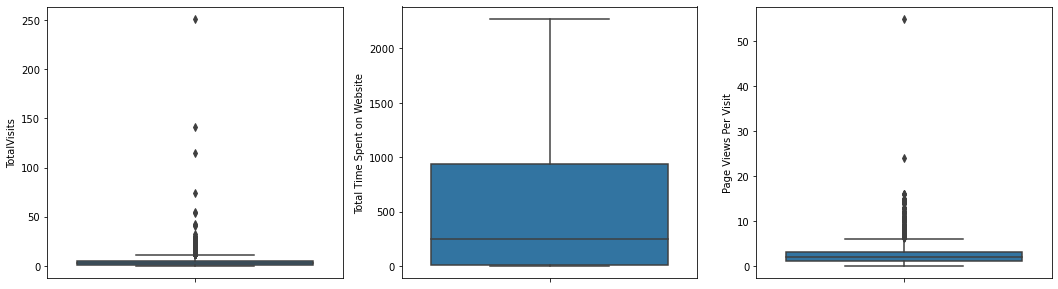

In [66]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', data = leads)
plt.subplot(1,3,2)
sns.boxplot(y = 'Total Time Spent on Website', data = leads)
plt.subplot(1,3,3)
sns.boxplot(y = 'Page Views Per Visit', data = leads)
plt.show()

In [67]:
# removing (statistical) outliers for 'TotalVisits' column above 99%

Q1 = leads['TotalVisits'].quantile(0.99)
leads = leads[leads['TotalVisits'] <= Q1]

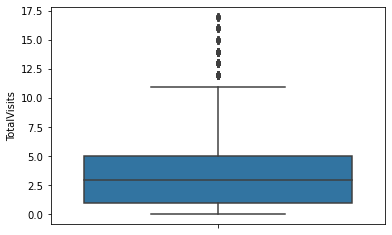

In [68]:
sns.boxplot(y = 'TotalVisits', data = leads)
plt.show()

In [69]:
# removing (statistical) outliers for 'Page Views Per Visit' column above 99%

Q2 = leads['Page Views Per Visit'].quantile(0.99)
leads = leads[leads['Page Views Per Visit'] <= Q2]

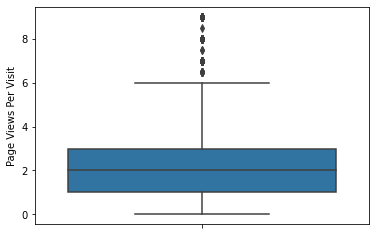

In [70]:
sns.boxplot(y = 'Page Views Per Visit', data = leads)
plt.show()

In [71]:
# Printing column names of final dataset after cleaning
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9090 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9090 non-null   object 
 1   Lead Source                             9090 non-null   object 
 2   Do Not Email                            9090 non-null   object 
 3   Converted                               9090 non-null   int64  
 4   TotalVisits                             9090 non-null   float64
 5   Total Time Spent on Website             9090 non-null   int64  
 6   Page Views Per Visit                    9090 non-null   float64
 7   Last Activity                           9090 non-null   object 
 8   Specialization                          9090 non-null   object 
 9   What is your current occupation         9090 non-null   object 
 10  Tags                                    9090 non-null   obje

In [72]:
leads.shape

(9090, 14)

In [73]:
# Determining the percentage of rows retained

round(100*(len(leads)/9240),2)

98.38

**Therefore, 98.38 % of the data has been retained.**

## Step 3: Data Analysis

**Categorical Variables Analysis**

#### Plotting the graph for categorical variable 'Lead Origin'

In [74]:
leads['Lead Origin'].value_counts()

Landing Page Submission    4769
API                        3548
Lead Add Form               717
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [75]:
leads['Lead Origin'] = leads['Lead Origin'].replace(['Lead Add Form','Quick Add Form'],'Forms')

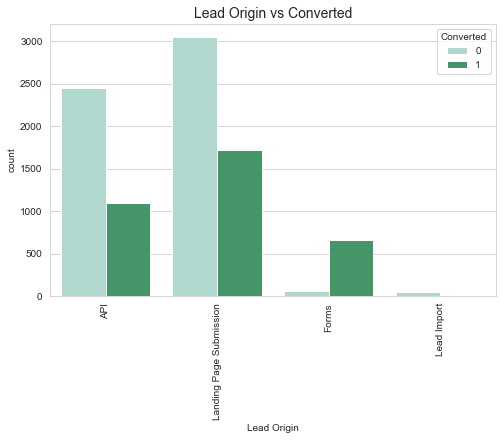

In [76]:
sns.set_style('whitegrid')

plt.figure(figsize=(8,5))
sns.countplot(x='Lead Origin', hue='Converted', data=leads, palette='BuGn')
plt.title('Lead Origin vs Converted', fontsize=14)
plt.xticks(rotation=90)
plt.show()

#### Plotting the graph for categorical variable 'Lead Source'

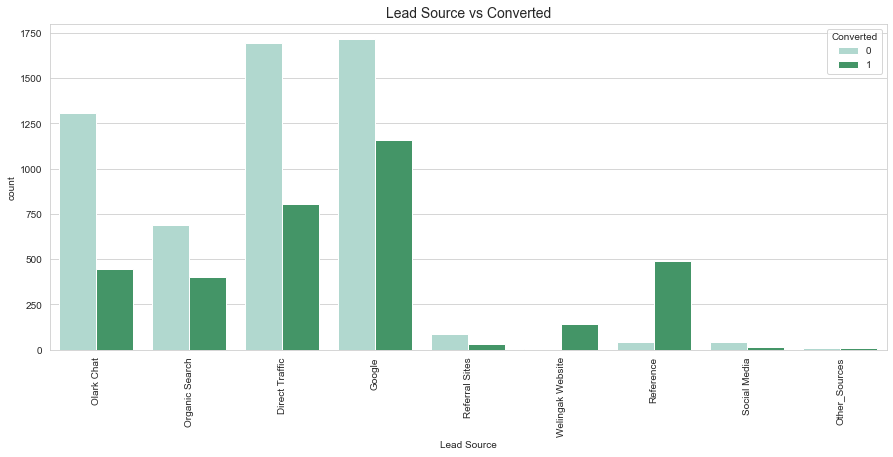

In [77]:
plt.figure(figsize=(15,6))
sns.countplot(x='Lead Source', hue='Converted', data=leads, palette='BuGn')
plt.title('Lead Source vs Converted', fontsize=14)
plt.xticks(rotation=90)
plt.show()

#### Plotting the graph for categorical variable 'Do Not Email'

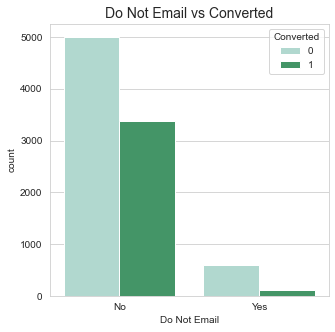

In [78]:
plt.figure(figsize=(5,5))
sns.countplot(x='Do Not Email', hue='Converted', data=leads, palette='BuGn')
plt.title('Do Not Email vs Converted', fontsize=14)
plt.show()

#### Plotting the graph for categorical variable 'Last Activity'

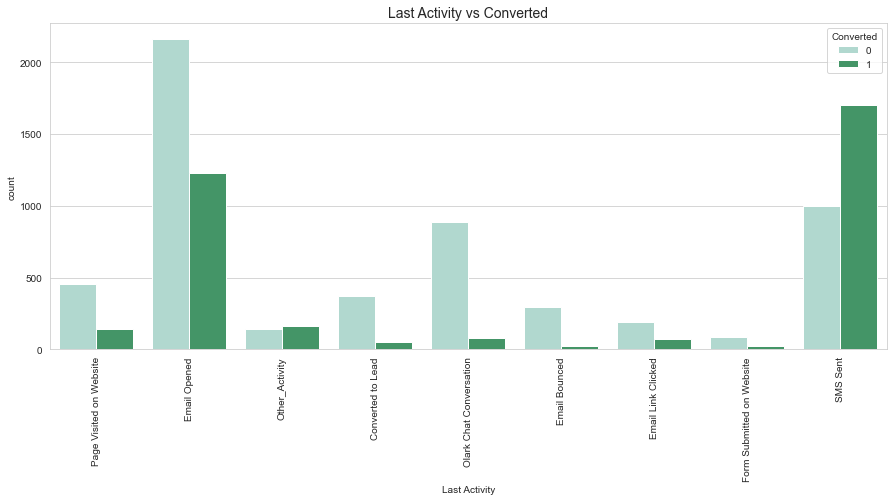

In [79]:
plt.figure(figsize=(15,6))
sns.countplot(x='Last Activity', hue='Converted', data=leads, palette='BuGn')
plt.title('Last Activity vs Converted', fontsize=14)
plt.xticks(rotation=90)
plt.show()

#### Plotting the graph for categorical variable 'Specialization'

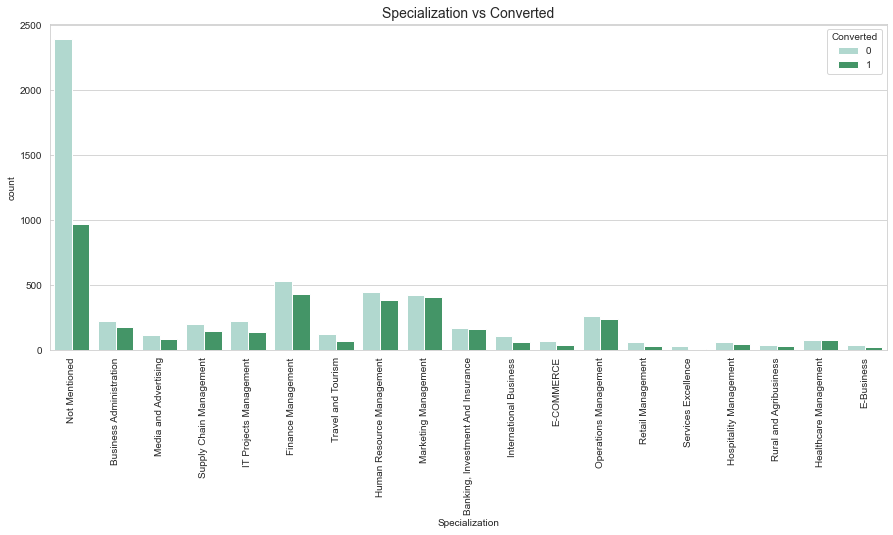

In [80]:
plt.figure(figsize=(15,6))
sns.countplot(x='Specialization', hue='Converted', data=leads, palette='BuGn')
plt.title('Specialization vs Converted', fontsize=14)
plt.xticks(rotation=90)
plt.show()

In [81]:
# Grouping together the all the Management related specializations as 'Management_Specializations'. 
# since they show almost a similar trend in leads acquired vs leads converted.

leads['Specialization'] = leads['Specialization'].replace(['Supply Chain Management','IT Projects Management','Finance Management','Human Resource Management','Marketing Management','Operations Management','Retail Management','Hospitality Management','Healthcare Management'],'Management_Specializations')

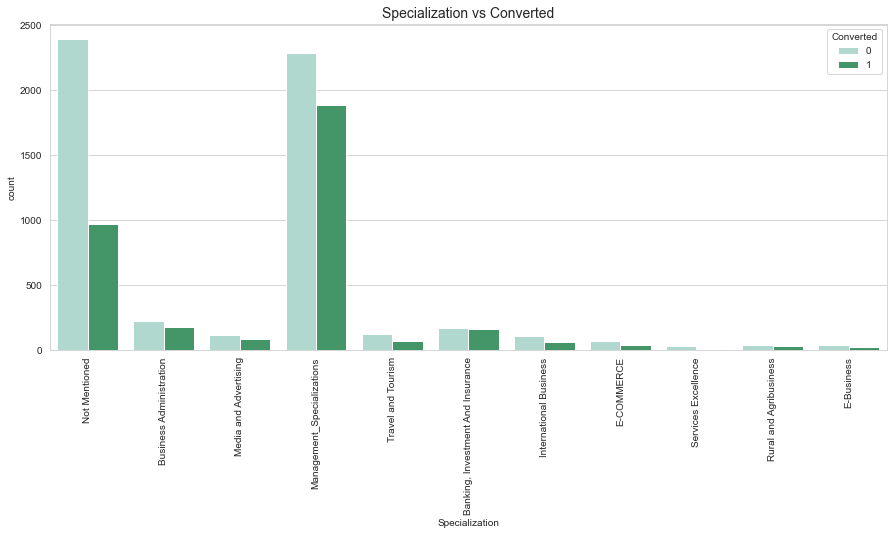

In [82]:
plt.figure(figsize=(15,6))
sns.countplot(x='Specialization', hue='Converted', data=leads, palette='BuGn')
plt.title('Specialization vs Converted', fontsize=14)
plt.xticks(rotation=90)
plt.show()

#### Plotting the graph for categorical variable 'What is your current occupation'

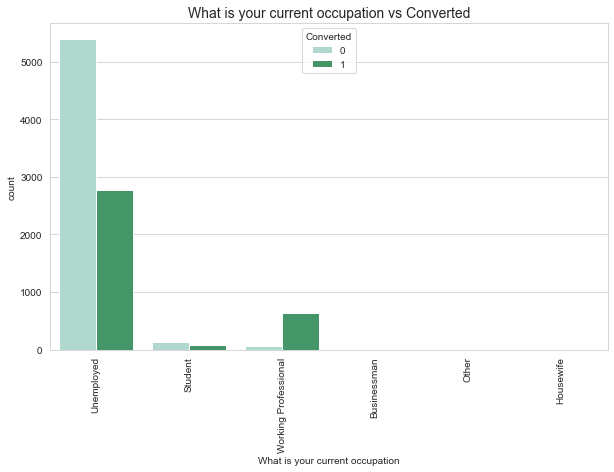

In [83]:
plt.figure(figsize=(10,6))
sns.countplot(x='What is your current occupation', hue='Converted', data=leads, palette='BuGn')
plt.title('What is your current occupation vs Converted', fontsize=14)
plt.xticks(rotation=90)
plt.show()

#### Plotting the graph for categorical variable 'Tags'

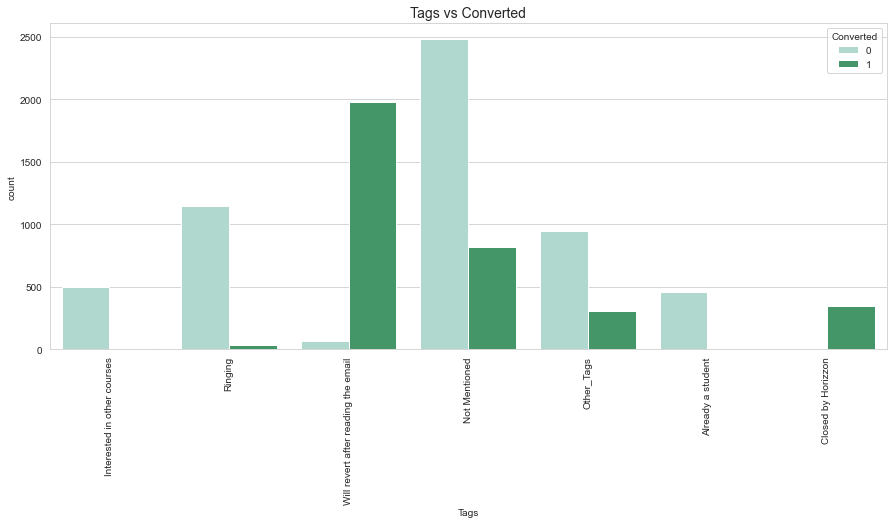

In [84]:
plt.figure(figsize=(15,6))
sns.countplot(x='Tags', hue='Converted', data=leads, palette='BuGn')
plt.title('Tags vs Converted', fontsize=14)
plt.xticks(rotation=90)
plt.show()

#### Plotting the graph for categorical variable 'City'

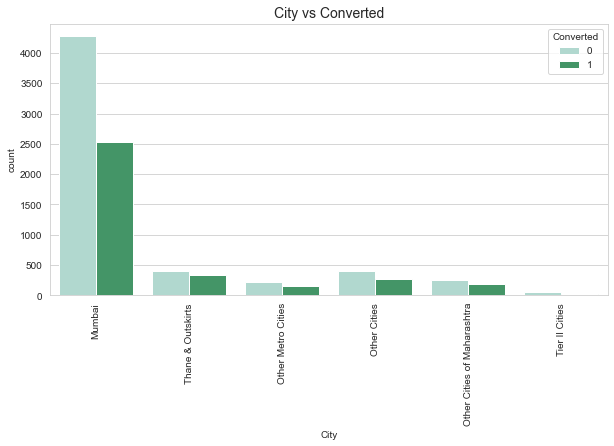

In [85]:
plt.figure(figsize=(10,5))
sns.countplot(x='City', hue='Converted', data=leads, palette='BuGn')
plt.title('City vs Converted', fontsize=14)
plt.xticks(rotation=90)
plt.show()

#### Plotting the graph for categorical variable 'A free copy of Mastering The Interview'

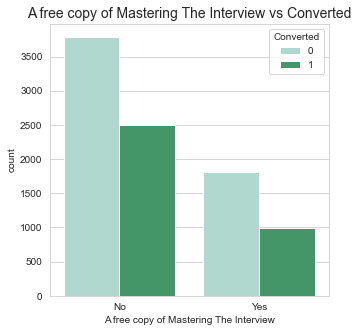

In [86]:
plt.figure(figsize=(5,5))
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data=leads, palette='BuGn')
plt.title('A free copy of Mastering The Interview vs Converted', fontsize=14)
plt.show()

#### Plotting the graph for categorical variable 'Last Notable Activity'

In [87]:
leads['Last Notable Activity'].value_counts()

Modified                        3361
Email Opened                    2789
SMS Sent                        2143
Page Visited on Website          288
Olark Chat Conversation          182
Email Link Clicked               170
Email Bounced                     59
Unsubscribed                      46
Unreachable                       32
Had a Phone Conversation          13
Email Marked Spam                  2
Approached upfront                 1
View in browser link Clicked       1
Email Received                     1
Form Submitted on Website          1
Resubscribed to emails             1
Name: Last Notable Activity, dtype: int64

In [88]:
# Grouping together low frequency categories as 'Other_Notable_Activity' 

leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Email Bounced','Unsubscribed','Unreachable','Had a Phone Conversation','Email Marked Spam','Resubscribed to emails','View in browser link Clicked','Approached upfront','Email Received','Form Submitted on Website'],'Other_Notable_Activity')

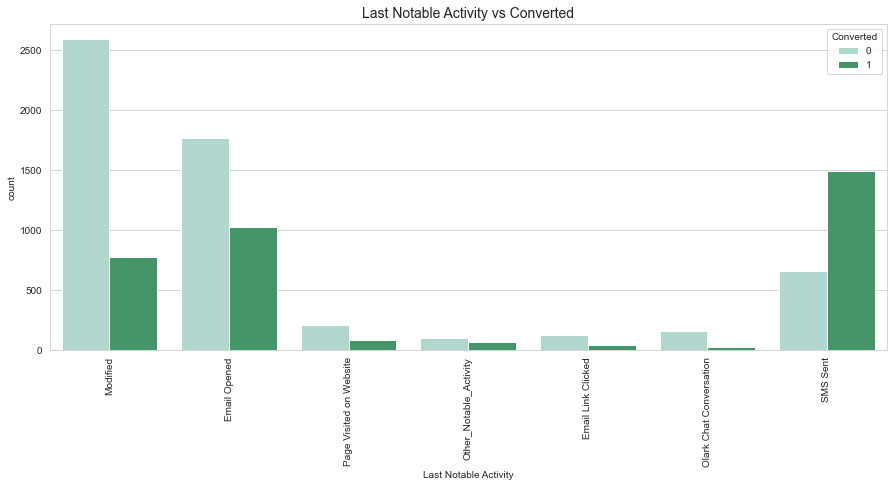

In [89]:
plt.figure(figsize=(15,6))
sns.countplot(x='Last Notable Activity', hue='Converted', data=leads, palette='BuGn')
plt.title('Last Notable Activity vs Converted', fontsize=14)
plt.xticks(rotation=90)
plt.show()

## Step 4: Dummy Variable Creation

#### Substituting the value 1 for 'Yes' and 0 for 'No'

In [90]:
# List of variables to map

varlist =  ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

**Creating dummy features for each categorical variables analysed above with multiple levels**

In [91]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'Tags', 'City', 'Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
leads = pd.concat([leads, dummy], axis=1)

**Dropping the repeated original variables**

In [92]:
# We have created dummies for the below variables, so we can drop them
leads = leads.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'Tags', 'City', 'Last Notable Activity'], 1)

In [93]:
leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Forms,Lead Origin_Landing Page Submission,Lead Origin_Lead Import,Lead Source_Google,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,2.0,1428,1.0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0


In [94]:
leads.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9090 entries, 0 to 9239
Data columns (total 57 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9090 non-null   int64  
 1   Converted                                             9090 non-null   int64  
 2   TotalVisits                                           9090 non-null   float64
 3   Total Time Spent on Website                           9090 non-null   int64  
 4   Page Views Per Visit                                  9090 non-null   float64
 5   A free copy of Mastering The Interview                9090 non-null   int64  
 6   Lead Origin_Forms                                     9090 non-null   uint8  
 7   Lead Origin_Landing Page Submission                   9090 non-null   uint8  
 8   Lead Origin_Lead Import                               9090

## Step 5: Test-Train Split

In [95]:
# Putting feature variable to X
X = leads.drop(['Converted'], axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Forms,Lead Origin_Landing Page Submission,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1.0,305,1.0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,2.0,1428,1.0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [96]:
# Putting target variable to y
y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [97]:
# Splitting the data into train and test dataset using train_test_split function.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [98]:
print('Train dataset shape: ', X_train.shape)

print('Test dataset shape: ', X_test.shape)

Train dataset shape:  (6363, 56)
Test dataset shape:  (2727, 56)


## Step 6: Feature Scaling

In [99]:
# Scaling the following columns 'TotalVisits','Total Time Spent on Website' and 'Page Views Per Visit'
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Forms,Lead Origin_Landing Page Submission,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
302,0,1.336782,-0.428736,0.044021,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6087,1,-1.094877,-0.887355,-1.206716,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1033,0,0.642022,-0.025151,1.477269,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
7656,1,0.989402,-0.241619,2.014065,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3241,0,0.294642,0.897591,-0.492776,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [100]:
### Checking the Conversion Rate percentage

converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
converted

38.448844884488445

**We conclude that we have almost 38.4% conversion rate**

## Step 7: Model Building

#### Running the First Training Model

#### Building Model 1

In [101]:
# Logistic regression model
lm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
lm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6306
Model Family:                Binomial   Df Model:                           56
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1465.9
Date:                Sun, 11 Apr 2021   Deviance:                       2931.7
Time:                        22:28:55   Pearson chi2:                 7.66e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.6214      1.673     -2.165      0.030      -6.900      -0.343
Do Not Email                                            -1.2134      0.258     -4.696      0.000      -1.720      -0.707
TotalVisits                                              0.2620      0.071      3.672      0.000       0.122       0.402
Total Time Spent on Website                              1.1085      0.056     19.758      0.000       0.999       1.218
Page Views Per Visit                                    -0.2928      0.084     -3.501      0.000      -0.457      -0.129
A free copy of Mastering The Interview                  -0.0655      0.158     -0.414      0.679      -0.376       0.245
Lead Origin_Forms                                        3.6192      0.965      3.749      0.000       1.727       5.511
Lead Origin_Landing Page Submission                     -0.3752      0.208     -1.807      0.071      -0.782       0.032
Lead Origin_Lead Import                                  1.2479      1.760      0.709      0.478      -2.203       4.698
Lead Source_Google                                       0.0669      0.165      0.405      0.685      -0.257       0.390
Lead Source_Olark Chat                                   0.9729      0.225      4.326      0.000       0.532       1.414
Lead Source_Organic Search                              -0.3754      0.195     -1.924      0.054      -0.758       0.007
Lead Source_Other_Sources                                0.9359      0.990      0.945      0.345      -1.005       2.877
Lead Source_Reference                                   -2.1193      1.031     -2.055      0.040      -4.141      -0.098
Lead Source_Referral Sites                               0.0569      0.463      0.123      0.902      -0.851       0.965
Lead Source_Social Media                                -1.2361      1.577     -0.784      0.433      -4.328       1.855
Lead Source_Welingak Website                             2.6586      1.399      1.900      0.057      -0.084       5.402
Last Activity_Email Bounced                             -0.9427      0.616     -1.530      0.126      -2.151       0.265
Last Activity_Email Link Clicked                         0.3261      0.573      0.569      0.569      -0.796       1.448
Last Activity_Email Opened                               0.7413      0.327      2.266      0.023       0.100       1.382
Last Activity_Form Submitted on Website                  0.5499      0.484      1.137      0.256      -0.398       1.498
Last Activity_Olark Chat Conversation                   -0.4947      0.358     -1.383      0.167      -1.196       0.206
Last Activity_Other_Activity                            -0

## Step 8: Feature Selection Using RFE

In [102]:
# Creating the logistic regression instance
lr = LogisticRegression()

# running RFE with 20 variables as output. As a result out of 56 variables, 36 will be eliminated based on RFE
rfe = RFE(lr, 20)
rfe = rfe.fit(X_train, y_train)
rfe.support_

array([ True, False,  True, False, False,  True, False, False, False,
        True, False, False,  True, False, False,  True,  True, False,
        True, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False,  True,
       False,  True])

In [103]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 16),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 15),
 ('A free copy of Mastering The Interview', False, 24),
 ('Lead Origin_Forms', True, 1),
 ('Lead Origin_Landing Page Submission', False, 7),
 ('Lead Origin_Lead Import', False, 26),
 ('Lead Source_Google', False, 27),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 11),
 ('Lead Source_Other_Sources', False, 4),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 33),
 ('Lead Source_Social Media', False, 22),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 36),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 8),
 ('Last Activity_Olark Chat Conversation', False, 2),
 ('Last Activity_Other_Activity', False, 30),
 ('Last Activity_Page Visited on Website', False, 20),
 ('Last

In [104]:
# Storing the variable names from the X_train dataframe having rfe.support_ value as True into another variable col
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Origin_Forms',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_SMS Sent',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Not Mentioned',
       'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Other_Notable_Activity',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

#### Building Model 2

In [105]:
# Building Model-2 after dropping 36 variables and checking the summary.

X_train_sm = sm.add_constant(X_train[col])
lm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6342
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1501.1
Date:                Sun, 11 Apr 2021   Deviance:                       3002.2
Time:                        22:28:59   Pearson chi2:                 7.14e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -5.0331      0.682     -7.382      0.000      -6.369      -3.697
Do Not Email                                    -1.2422      0.251     -4.948      0.000      -1.734      -0.750
Total Time Spent on Website                      1.1033      0.055     20.236      0.000       0.996       1.210
Lead Origin_Forms                                4.0352      0.937      4.306      0.000       2.199       5.872
Lead Source_Olark Chat                           1.2379      0.135      9.156      0.000       0.973       1.503
Lead Source_Reference                           -2.1160      0.994     -2.130      0.033      -4.064      -0.168
Lead Source_Welingak Website                     2.6218      1.377      1.904      0.057      -0.077       5.321
Last Activity_Email Bounced                     -0.9187      0.527     -1.744      0.081      -1.951       0.114
Last Activity_Email Opened                       0.9948      0.128      7.791      0.000       0.745       1.245
Last Activity_SMS Sent                           1.0946      0.196      5.574      0.000       0.710       1.480
Specialization_Travel and Tourism               -0.8795      0.397     -2.216      0.027      -1.657      -0.102
What is your current occupation_Student         -0.3705      0.558     -0.664      0.507      -1.464       0.723
What is your current occupation_Unemployed      -0.8903      0.289     -3.085      0.002      -1.456      -0.325
Tags_Closed by Horizzon                          9.0559      0.948      9.554      0.000       7.198      10.914
Tags_Interested in other courses                 0.7216      0.727      0.993      0.321      -0.703       2.146
Tags_Not Mentioned                               3.2016      0.613      5.219      0.000       1.999       4.404
Tags_Other_Tags                                  3.2366      0.617      5.247      0.000       2.028       4.446
Tags_Ringing                                     0.1055      0.651      0.162      0.871      -1.170       1.381
Tags_Will revert after reading the email         7.2569      0.630     11.515      0.000       6.022       8.492
Last Notable Activity_Other_Notable_Activity     1.8177      0.463      3.928      0.000       0.911       2.725
Last Notable Activity_SMS Sent                   1.7376      0.191      9.097      0.000       1.363       2.112
================================================================================================================
"""

#### Dropping the column 'Tags_Ringing' since it has high p-value hence it is insignificant.

In [106]:
col = col.drop('Tags_Ringing', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Origin_Forms',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_SMS Sent',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Not Mentioned',
       'Tags_Other_Tags', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Other_Notable_Activity',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

#### Building Model 3

In [107]:
# Building Model-3 after dropping the 'Tags_Ringing' and checking the summary.

X_train_sm=sm.add_constant(X_train[col])
lm3=sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6343
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1501.1
Date:                Sun, 11 Apr 2021   Deviance:                       3002.2
Time:                        22:29:00   Pearson chi2:                 7.15e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -4.9414      0.375    -13.165      0.000      -5.677      -4.206
Do Not Email                                    -1.2431      0.251     -4.952      0.000      -1.735      -0.751
Total Time Spent on Website                      1.1032      0.055     20.237      0.000       0.996       1.210
Lead Origin_Forms                                4.0385      0.938      4.307      0.000       2.201       5.876
Lead Source_Olark Chat                           1.2372      0.135      9.156      0.000       0.972       1.502
Lead Source_Reference                           -2.1177      0.994     -2.129      0.033      -4.067      -0.169
Lead Source_Welingak Website                     2.6184      1.378      1.901      0.057      -0.082       5.318
Last Activity_Email Bounced                     -0.9181      0.527     -1.743      0.081      -1.951       0.114
Last Activity_Email Opened                       0.9943      0.128      7.791      0.000       0.744       1.244
Last Activity_SMS Sent                           1.0948      0.196      5.575      0.000       0.710       1.480
Specialization_Travel and Tourism               -0.8801      0.397     -2.218      0.027      -1.658      -0.102
What is your current occupation_Student         -0.3863      0.548     -0.705      0.481      -1.459       0.687
What is your current occupation_Unemployed      -0.8897      0.289     -3.083      0.002      -1.455      -0.324
Tags_Closed by Horizzon                          8.9636      0.755     11.869      0.000       7.483      10.444
Tags_Interested in other courses                 0.6300      0.453      1.391      0.164      -0.258       1.518
Tags_Not Mentioned                               3.1093      0.220     14.118      0.000       2.678       3.541
Tags_Other_Tags                                  3.1443      0.229     13.715      0.000       2.695       3.594
Tags_Will revert after reading the email         7.1650      0.269     26.683      0.000       6.639       7.691
Last Notable Activity_Other_Notable_Activity     1.8179      0.463      3.928      0.000       0.911       2.725
Last Notable Activity_SMS Sent                   1.7394      0.191      9.121      0.000       1.366       2.113
================================================================================================================
"""

#### Dropping the column 'What is your current occupation_Student' since it has high p-value hence it is insignificant.

In [108]:
col = col.drop('What is your current occupation_Student', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Origin_Forms',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_SMS Sent',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Unemployed', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Not Mentioned',
       'Tags_Other_Tags', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Other_Notable_Activity',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

#### Building Model 4

In [109]:
# Building Model-4 after dropping the 'What is your current occupation_Student' and checking the summary.

X_train_sm=sm.add_constant(X_train[col])
lm4=sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6344
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1501.4
Date:                Sun, 11 Apr 2021   Deviance:                       3002.7
Time:                        22:29:01   Pearson chi2:                 7.19e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -5.0584      0.334    -15.139      0.000      -5.713      -4.403
Do Not Email                                    -1.2404      0.251     -4.946      0.000      -1.732      -0.749
Total Time Spent on Website                      1.1041      0.055     20.254      0.000       0.997       1.211
Lead Origin_Forms                                4.0436      0.939      4.305      0.000       2.203       5.884
Lead Source_Olark Chat                           1.2372      0.135      9.156      0.000       0.972       1.502
Lead Source_Reference                           -2.1078      0.996     -2.116      0.034      -4.060      -0.156
Lead Source_Welingak Website                     2.6140      1.379      1.896      0.058      -0.088       5.316
Last Activity_Email Bounced                     -0.9299      0.525     -1.770      0.077      -1.960       0.100
Last Activity_Email Opened                       0.9959      0.128      7.807      0.000       0.746       1.246
Last Activity_SMS Sent                           1.0998      0.196      5.607      0.000       0.715       1.484
Specialization_Travel and Tourism               -0.8820      0.397     -2.221      0.026      -1.660      -0.104
What is your current occupation_Unemployed      -0.7871      0.246     -3.200      0.001      -1.269      -0.305
Tags_Closed by Horizzon                          8.9885      0.755     11.913      0.000       7.510      10.467
Tags_Interested in other courses                 0.6417      0.453      1.417      0.156      -0.246       1.529
Tags_Not Mentioned                               3.1213      0.220     14.215      0.000       2.691       3.552
Tags_Other_Tags                                  3.1548      0.229     13.797      0.000       2.707       3.603
Tags_Will revert after reading the email         7.1865      0.267     26.928      0.000       6.663       7.710
Last Notable Activity_Other_Notable_Activity     1.8220      0.462      3.942      0.000       0.916       2.728
Last Notable Activity_SMS Sent                   1.7380      0.191      9.118      0.000       1.364       2.112
================================================================================================================
"""

#### Dropping the column 'Tags_Interested in other courses' since it has high p-value hence it is insignificant.

In [110]:
col = col.drop('Tags_Interested in other courses', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Origin_Forms',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_SMS Sent',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Unemployed', 'Tags_Closed by Horizzon',
       'Tags_Not Mentioned', 'Tags_Other_Tags',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Other_Notable_Activity',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

#### Building Model 5

In [111]:
# Building Model-5 after dropping the 'Tags_Interested in other courses' and checking the summary.

X_train_sm=sm.add_constant(X_train[col])
lm5=sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6345
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1502.3
Date:                Sun, 11 Apr 2021   Deviance:                       3004.5
Time:                        22:29:01   Pearson chi2:                 6.97e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -4.9327      0.318    -15.503      0.000      -5.556      -4.309
Do Not Email                                    -1.2370      0.250     -4.939      0.000      -1.728      -0.746
Total Time Spent on Website                      1.1047      0.055     20.268      0.000       0.998       1.212
Lead Origin_Forms                                4.0129      0.932      4.307      0.000       2.187       5.839
Lead Source_Olark Chat                           1.2383      0.135      9.167      0.000       0.974       1.503
Lead Source_Reference                           -2.0807      0.989     -2.104      0.035      -4.019      -0.142
Lead Source_Welingak Website                     2.6441      1.374      1.925      0.054      -0.048       5.336
Last Activity_Email Bounced                     -0.9355      0.525     -1.782      0.075      -1.964       0.093
Last Activity_Email Opened                       0.9922      0.128      7.771      0.000       0.742       1.242
Last Activity_SMS Sent                           1.0971      0.196      5.587      0.000       0.712       1.482
Specialization_Travel and Tourism               -0.8774      0.397     -2.208      0.027      -1.656      -0.099
What is your current occupation_Unemployed      -0.7967      0.247     -3.231      0.001      -1.280      -0.313
Tags_Closed by Horizzon                          8.8737      0.748     11.857      0.000       7.407      10.341
Tags_Not Mentioned                               3.0113      0.199     15.136      0.000       2.621       3.401
Tags_Other_Tags                                  3.0452      0.209     14.567      0.000       2.636       3.455
Tags_Will revert after reading the email         7.0731      0.249     28.381      0.000       6.585       7.562
Last Notable Activity_Other_Notable_Activity     1.8143      0.462      3.928      0.000       0.909       2.719
Last Notable Activity_SMS Sent                   1.7217      0.190      9.050      0.000       1.349       2.095
================================================================================================================
"""

#### Dropping the column 'Last Activity_Email Bounced' since it has high p-value hence it is insignificant.

In [112]:
col = col.drop('Last Activity_Email Bounced', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Origin_Forms',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_SMS Sent', 'Specialization_Travel and Tourism',
       'What is your current occupation_Unemployed', 'Tags_Closed by Horizzon',
       'Tags_Not Mentioned', 'Tags_Other_Tags',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Other_Notable_Activity',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

#### Building Model 6

In [113]:
# Building Model-6 after dropping the 'Last Activity_Email Bounced' and checking the summary.

X_train_sm=sm.add_constant(X_train[col])
lm6=sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6346
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1504.0
Date:                Sun, 11 Apr 2021   Deviance:                       3008.0
Time:                        22:29:02   Pearson chi2:                 6.95e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -4.9637      0.317    -15.665      0.000      -5.585      -4.343
Do Not Email                                    -1.4197      0.233     -6.082      0.000      -1.877      -0.962
Total Time Spent on Website                      1.1029      0.054     20.243      0.000       0.996       1.210
Lead Origin_Forms                                3.8809      0.898      4.320      0.000       2.120       5.642
Lead Source_Olark Chat                           1.2405      0.135      9.184      0.000       0.976       1.505
Lead Source_Reference                           -1.9464      0.958     -2.032      0.042      -3.824      -0.069
Lead Source_Welingak Website                     2.7753      1.351      2.054      0.040       0.127       5.423
Last Activity_Email Opened                       1.0174      0.127      7.994      0.000       0.768       1.267
Last Activity_SMS Sent                           1.1355      0.195      5.813      0.000       0.753       1.518
Specialization_Travel and Tourism               -0.9163      0.396     -2.314      0.021      -1.692      -0.140
What is your current occupation_Unemployed      -0.7937      0.245     -3.240      0.001      -1.274      -0.314
Tags_Closed by Horizzon                          8.8650      0.748     11.848      0.000       7.398      10.331
Tags_Not Mentioned                               3.0142      0.199     15.145      0.000       2.624       3.404
Tags_Other_Tags                                  3.0537      0.209     14.605      0.000       2.644       3.464
Tags_Will revert after reading the email         7.0737      0.249     28.425      0.000       6.586       7.562
Last Notable Activity_Other_Notable_Activity     1.6182      0.435      3.718      0.000       0.765       2.471
Last Notable Activity_SMS Sent                   1.7241      0.190      9.063      0.000       1.351       2.097
================================================================================================================
"""

### VIF for each features

In [114]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Forms,18.98
4,Lead Source_Reference,14.97
7,Last Activity_SMS Sent,5.74
15,Last Notable Activity_SMS Sent,4.94
5,Lead Source_Welingak Website,4.91
9,What is your current occupation_Unemployed,4.49
11,Tags_Not Mentioned,2.49
6,Last Activity_Email Opened,2.08
13,Tags_Will revert after reading the email,2.03
3,Lead Source_Olark Chat,1.59


**There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'Lead Origin_Forms' has the highest VIF. So let's start by dropping that.**

In [115]:
col = col.drop('Lead Origin_Forms', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_SMS Sent',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Unemployed', 'Tags_Closed by Horizzon',
       'Tags_Not Mentioned', 'Tags_Other_Tags',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Other_Notable_Activity',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [116]:
# Let's check the VIFs again

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Last Activity_SMS Sent,5.73
14,Last Notable Activity_SMS Sent,4.94
8,What is your current occupation_Unemployed,4.48
10,Tags_Not Mentioned,2.49
5,Last Activity_Email Opened,2.08
12,Tags_Will revert after reading the email,2.03
2,Lead Source_Olark Chat,1.59
11,Tags_Other_Tags,1.50
3,Lead Source_Reference,1.43
1,Total Time Spent on Website,1.36


In [117]:
# Let's drop 'Last Activity_SMS Sent' since it has a high VIF
col = col.drop('Last Activity_SMS Sent')
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Specialization_Travel and Tourism',
       'What is your current occupation_Unemployed', 'Tags_Closed by Horizzon',
       'Tags_Not Mentioned', 'Tags_Other_Tags',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Other_Notable_Activity',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

#### Building Model 7

In [118]:
# Building Model-7 after dropping the 'Lead Origin_Forms' and 'Last Activity_SMS Sent' and checking the summary.

X_train_sm=sm.add_constant(X_train[col])
lm7=sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6348
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1533.4
Date:                Sun, 11 Apr 2021   Deviance:                       3066.9
Time:                        22:29:05   Pearson chi2:                 7.01e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -4.6715      0.309    -15.097      0.000      -5.278      -4.065
Do Not Email                                    -1.3573      0.223     -6.074      0.000      -1.795      -0.919
Total Time Spent on Website                      1.0909      0.054     20.279      0.000       0.985       1.196
Lead Source_Olark Chat                           1.1193      0.132      8.460      0.000       0.860       1.379
Lead Source_Reference                            2.0237      0.356      5.689      0.000       1.326       2.721
Lead Source_Welingak Website                     6.8043      1.027      6.626      0.000       4.792       8.817
Last Activity_Email Opened                       0.7321      0.114      6.445      0.000       0.509       0.955
Specialization_Travel and Tourism               -0.9068      0.401     -2.260      0.024      -1.693      -0.120
What is your current occupation_Unemployed      -0.7761      0.244     -3.184      0.001      -1.254      -0.298
Tags_Closed by Horizzon                          8.8298      0.751     11.757      0.000       7.358      10.302
Tags_Not Mentioned                               3.0398      0.198     15.357      0.000       2.652       3.428
Tags_Other_Tags                                  3.0496      0.208     14.684      0.000       2.643       3.457
Tags_Will revert after reading the email         7.0742      0.246     28.728      0.000       6.592       7.557
Last Notable Activity_Other_Notable_Activity     1.3747      0.413      3.325      0.001       0.564       2.185
Last Notable Activity_SMS Sent                   2.5763      0.129     20.012      0.000       2.324       2.829
================================================================================================================
"""

#### Since model 7 seems to be stable with significant p-value(<0.05), so proceeding with further analysis without dropping any other columns.

In [119]:
# Let's check the VIFs again

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,What is your current occupation_Unemployed,4.27
9,Tags_Not Mentioned,2.46
11,Tags_Will revert after reading the email,1.98
5,Last Activity_Email Opened,1.92
13,Last Notable Activity_SMS Sent,1.76
2,Lead Source_Olark Chat,1.58
10,Tags_Other_Tags,1.49
3,Lead Source_Reference,1.43
1,Total Time Spent on Website,1.36
8,Tags_Closed by Horizzon,1.35


#### All variables have a good value of VIF for our chosen model (lm7). So we do not have to drop an variables further and we can proceed with making predictions using this model only

## Step 9: Getting the predicted values on the train set and checking for other metrics.

### 9.1 Getting predicted y_train for X_train_sm using the stable model (lm7)

In [120]:
# Getting the predicted y-value for X_train_sm dataset using the chosen logistic regression model (Model - 8).

y_train_pred = res.predict(X_train_sm)
print (y_train_pred[:5])

y_train_pred= y_train_pred.values.reshape(-1)
y_train_pred

302     0.104953
6087    0.026242
1033    0.154059
7656    0.011072
3241    0.994415
dtype: float64


array([0.10495279, 0.02624215, 0.15405943, ..., 0.23604171, 0.45605727,
       0.00359928])

In [121]:
# Creating dataframe having the original Converted values along with the predicted Converted Predicted values.

y_train_pred_df = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_df['LeadId'] = y_train.index
y_train_pred_df.head()

,Converted,Converted_Prob,LeadId
0,0,0.104953,302
1,0,0.026242,6087
2,0,0.154059,1033
3,0,0.011072,7656
4,1,0.994415,3241


In [122]:
y_train_pred_df['Predicted'] = y_train_pred_df.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_df.head()

,Converted,Converted_Prob,LeadId,Predicted
0,0,0.104953,302,0
1,0,0.026242,6087,0
2,0,0.154059,1033,0
3,0,0.011072,7656,0
4,1,0.994415,3241,1


### 9.2 Confusion Matrix

In [123]:
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_df.Converted, y_train_pred_df.Predicted )
print(confusion)

[[3730  205]
 [ 410 2018]]


In [124]:
# Checking the overall accuracy.

print(metrics.accuracy_score(y_train_pred_df.Converted, y_train_pred_df.Predicted))

0.9033474776049033


#### Accuracy rate is around 90% which is good. However we will also need to calculate the other metrics as we cannot depend only on the accuracy metrics

### 9.3 Checking for other Metrics-

Sensitivity, 
Specificity, 
False Positive Rate, 
Postitive Predictive Value 
and Negative Predictive Value

In [125]:
# Metrics-Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# To check the sensitivity of our logistic regression model

TP / float(TP+FN)

0.8311367380560132

In [126]:
# Calculating specificity value

TN / float(TN+FP)

0.9479034307496823

In [127]:
# Calculating false postive rate - predicting non conversion when leads have converted

print(FP/ float(TN+FP))

0.052096569250317665


In [128]:
# Calculating the positive predictive value 

print (TP / float(TP+FP))

0.9077822762033289


In [129]:
# Calculating the Negative predictive value

print (TN / float(TN+ FN))

0.9009661835748792


### 9.4 Defining function for drawing the ROC curve

In [130]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.4f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

### 9.5 Plotting the ROC Curve

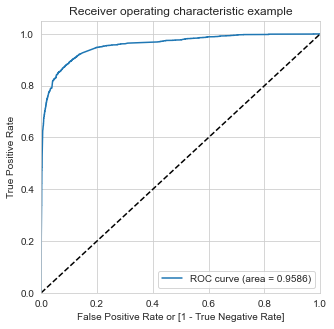

In [131]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_df.Converted, y_train_pred_df.Converted_Prob, 
                                         drop_intermediate = False )
draw_roc(y_train_pred_df.Converted, y_train_pred_df.Converted_Prob)

### 9.6 Calculating the area under the curve (GINI)

In [132]:
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [133]:
auc = auc_val(fpr,tpr)
auc

0.9585975457862247

#### As a rule of thumb, an AUC can be classed as follows,

0.90 - 1.00 = excellent

0.80 - 0.90 = good

0.70 - 0.80 = fair

0.60 - 0.70 = poor

0.50 - 0.60 = fail

Since we got a value of 0.9586, our model seems to be doing well on the training dataset.

## Step 10: Finding Optimal Cutoff Point
#### Optimal cut off probability is that prob where we get balanced sensitivity and specificity


#### Creating columns with different probability cutoffs 

In [134]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_df[i]= y_train_pred_df.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_df.head()

,Converted,Converted_Prob,LeadId,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.104953,302,0,1,1,0,0,0,0,0,0,0,0
1,0,0.026242,6087,0,1,0,0,0,0,0,0,0,0,0
2,0,0.154059,1033,0,1,1,0,0,0,0,0,0,0,0
3,0,0.011072,7656,0,1,0,0,0,0,0,0,0,0,0
4,1,0.994415,3241,1,1,1,1,1,1,1,1,1,1,1


#### Calculating accuracy sensitivity and specificity for various probability cutoffs.

In [135]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_df.Converted, y_train_pred_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.381581     1.000000     0.000000
0.1   0.1  0.806852     0.961697     0.711309
0.2   0.2  0.887160     0.916392     0.869123
0.3   0.3  0.895647     0.892092     0.897840
0.4   0.4  0.902247     0.861203     0.927573
0.5   0.5  0.903347     0.831137     0.947903
0.6   0.6  0.898318     0.787068     0.966963
0.7   0.7  0.893918     0.762768     0.974841
0.8   0.8  0.885903     0.729407     0.982465
0.9   0.9  0.865472     0.661450     0.991360


#### plotting accuracy sensitivity and specificity for various probabilities.

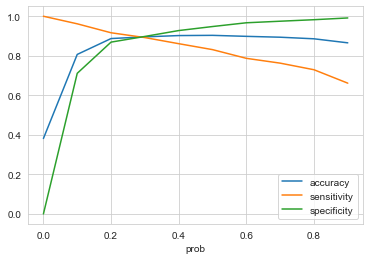

In [136]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

In [137]:
# Let us make the final prediction using 0.3 as the cut off as seen in above plotted diagram

y_train_pred_df['final_predicted'] = y_train_pred_df.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_df.head()

,Converted,Converted_Prob,LeadId,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.104953,302,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.026242,6087,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.154059,1033,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.011072,7656,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.994415,3241,1,1,1,1,1,1,1,1,1,1,1,1


In [138]:
# Calculating the lead score for train dataset

y_train_pred_df['lead_score'] = y_train_pred_df.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_df.head(10)

,Converted,Converted_Prob,LeadId,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,0,0.104953,302,0,1,1,0,0,0,0,0,0,0,0,0,10
1,0,0.026242,6087,0,1,0,0,0,0,0,0,0,0,0,0,3
2,0,0.154059,1033,0,1,1,0,0,0,0,0,0,0,0,0,15
3,0,0.011072,7656,0,1,0,0,0,0,0,0,0,0,0,0,1
4,1,0.994415,3241,1,1,1,1,1,1,1,1,1,1,1,1,99
5,0,0.070593,5738,0,1,0,0,0,0,0,0,0,0,0,0,7
6,0,0.010770,7366,0,1,0,0,0,0,0,0,0,0,0,0,1
7,0,0.042958,3680,0,1,0,0,0,0,0,0,0,0,0,0,4
8,1,0.993904,4170,1,1,1,1,1,1,1,1,1,1,1,1,99
9,0,0.099805,43,0,1,0,0,0,0,0,0,0,0,0,0,10


In [139]:
# checking if 80% cases are correctly predicted based on the converted column.
# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_df.loc[y_train_pred_df['Converted']==1,['Converted','final_predicted']]
checking_df['final_predicted'].value_counts()

1    2166
0     262
Name: final_predicted, dtype: int64

In [140]:
# Calculating the precentage of final_predicted conversions based on above outcome.

2232/float(2232+196)

0.9192751235584844

#### Hence we can see that the final prediction of conversions have a target of 92% conversion as per the X Educations CEO's requirement . Hence this is a good model. Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value, Negative Predicitive Value on final prediction on train set

In [141]:
# Calculating the overall accuracy score.

metrics.accuracy_score(y_train_pred_df.Converted, y_train_pred_df.final_predicted)

0.8956467075278957

In [142]:
# Creating the confusion matrix - 2 again.

confusion2 = metrics.confusion_matrix(y_train_pred_df.Converted, y_train_pred_df.final_predicted )
confusion2

array([[3533,  402],
       [ 262, 2166]], dtype=int64)

In [143]:
# Calculating other metrics - sensitivity, specificity etc.

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# Calculating the sensitivity of our logistic regression model

TP / float(TP+FN)

0.8920922570016474

In [144]:
# Calculating specificity value

TN / float(TN+FP)

0.8978398983481576

In [145]:
# Calculate false postive rate - predicting conversions when leads has not converted

print(FP/ float(TN+FP))

0.10216010165184244


In [146]:
# Calculating the Positive predictive value 

print (TP / float(TP+FP))

0.8434579439252337


In [147]:
# Calculating the Negative predictive value

print (TN / float(TN+ FN))

0.9309617918313571


#### Metrics - Precision and Recall

In [148]:
# confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_df.Converted, y_train_pred_df.Predicted )
confusion

array([[3730,  205],
       [ 410, 2018]], dtype=int64)

In [149]:
# calculating the precision

precision=precision_score(y_train_pred_df.Converted, y_train_pred_df.Predicted)
precision

0.9077822762033289

In [150]:
# calculating the recall

recall = recall_score(y_train_pred_df.Converted, y_train_pred_df.Predicted)
recall

0.8311367380560132

#### F=2*(precision * recall)/(precision + recall)

In [151]:
F=2*(precision*recall)/(precision+recall)
F

0.8677703719630186

#### Precision and recall tradeoff

In [152]:
# y_train_pred_df.Converted, y_train_pred_df.Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_df.Converted, y_train_pred_df.Converted_Prob)

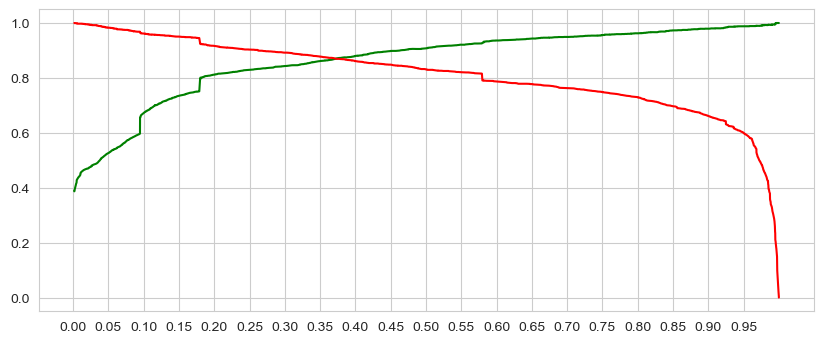

In [153]:
plt.figure(figsize=(10, 4), dpi=100, facecolor='w', edgecolor='k', frameon='True')
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0, 1, step=0.05))
plt.show()

#### From the precision-recall graph above, we get the optimal threshold value as close to 0.37. However our business requirement here is to have Lead Conversion Rate around 80%. This is already achieved with our earlier threshold value of 0.3. So we will stick to this value.

## Step 11: Making the predictions on the test dataset

In [154]:
# Scaling the following variables : 'TotalVisits','Total Time Spent on Website' and 'Page Views Per Visit'

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

In [155]:
# Using the selected variables (col) for test that were present in the final logistic regression model (lm7)
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Opened,Specialization_Travel and Tourism,What is your current occupation_Unemployed,Tags_Closed by Horizzon,Tags_Not Mentioned,Tags_Other_Tags,Tags_Will revert after reading the email,Last Notable Activity_Other_Notable_Activity,Last Notable Activity_SMS Sent
6906,0,1.919395,0,0,0,0,0,1,0,0,0,1,0,1
1873,0,-0.546142,0,0,0,0,0,1,0,0,0,0,0,0
771,0,-0.797465,0,0,0,1,0,1,0,0,0,0,0,0
4495,0,-0.623190,0,0,0,1,0,1,0,0,0,0,0,0
9061,0,2.392690,0,0,0,1,0,1,0,0,1,0,0,0


In [156]:
# Adding the constant to X_test data

X_test_sm = sm.add_constant(X_test)

#### Making predictions on the test set using our chosen logistic regression model (lm7)

In [157]:
y_test_Pred = res.predict(X_test_sm)
y_test_Pred[:5]

6906    0.998161
1873    0.002368
771     0.003738
4495    0.004517
9061    0.719960
dtype: float64

In [158]:
# Converting y_Pred to a dataframe which is an array

y_Pred_1 = pd.DataFrame(y_test_Pred)
y_Pred_1.head()

,0
6906,0.998161
1873,0.002368
771,0.003738
4495,0.004517
9061,0.719960


In [159]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting index value to LeadId variable
y_test_df['LeadId'] = y_test_df.index
y_test_df.head()

,Converted,LeadId
6906,1,6906
1873,0,1873
771,0,771
4495,0,4495
9061,1,9061


In [160]:
# Removing index for both dataframes to append them side by side 
y_Pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_Pred_1
y_pred_df = pd.concat([y_test_df, y_Pred_1],axis=1)
y_pred_df.head()

,Converted,LeadId,0
0,1,6906,0.998161
1,0,1873,0.002368
2,0,771,0.003738
3,0,4495,0.004517
4,1,9061,0.719960


In [161]:
# Renaming the column label '0' to 'Converted_Prob'
y_pred_df=y_pred_df.rename(columns={ 0 : 'Converted_Prob'})
y_pred_df.head()

,Converted,LeadId,Converted_Prob
0,1,6906,0.998161
1,0,1873,0.002368
2,0,771,0.003738
3,0,4495,0.004517
4,1,9061,0.719960


In [162]:
# Rearranging the columns in y_pred_df dataframe

y_pred_df = y_pred_df.reindex(['LeadId','Converted','Converted_Prob'], axis=1)
y_pred_df.head()

,LeadId,Converted,Converted_Prob
0,6906,1,0.998161
1,1873,0,0.002368
2,771,0,0.003738
3,4495,0,0.004517
4,9061,1,0.719960


In [163]:
# Creating the columns with different probability cutoffs 0.0, 0.1, 0.2 ... so on for test dataset. 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_df[i]= y_pred_df.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_pred_df.head()

,LeadId,Converted,Converted_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,6906,1,0.998161,1,1,1,1,1,1,1,1,1,1
1,1873,0,0.002368,1,0,0,0,0,0,0,0,0,0
2,771,0,0.003738,1,0,0,0,0,0,0,0,0,0
3,4495,0,0.004517,1,0,0,0,0,0,0,0,0,0
4,9061,1,0.719960,1,1,1,1,1,1,1,1,0,0


In [164]:
# Based on cut off threshold using accuracy, sensitivity and specificity of 0.3%

y_pred_df['final_predicted'] = y_pred_df.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_df.head()

,LeadId,Converted,Converted_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,6906,1,0.998161,1,1,1,1,1,1,1,1,1,1,1
1,1873,0,0.002368,1,0,0,0,0,0,0,0,0,0,0
2,771,0,0.003738,1,0,0,0,0,0,0,0,0,0,0
3,4495,0,0.004517,1,0,0,0,0,0,0,0,0,0,0
4,9061,1,0.719960,1,1,1,1,1,1,1,1,0,0,1


In [165]:
# Calculate the lead score

y_pred_df['lead_score'] = y_pred_df.Converted_Prob.map(lambda x: round(x*100))
y_pred_df.head(10)

,LeadId,Converted,Converted_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,6906,1,0.998161,1,1,1,1,1,1,1,1,1,1,1,100
1,1873,0,0.002368,1,0,0,0,0,0,0,0,0,0,0,0
2,771,0,0.003738,1,0,0,0,0,0,0,0,0,0,0,0
3,4495,0,0.004517,1,0,0,0,0,0,0,0,0,0,0,0
4,9061,1,0.719960,1,1,1,1,1,1,1,1,0,0,1,72
5,4929,1,0.244043,1,1,1,0,0,0,0,0,0,0,0,24
6,2308,0,0.128618,1,1,0,0,0,0,0,0,0,0,0,13
7,1034,0,0.034293,1,0,0,0,0,0,0,0,0,0,0,3
8,9033,0,0.003709,1,0,0,0,0,0,0,0,0,0,0,0
9,7008,1,0.917462,1,1,1,1,1,1,1,1,1,1,1,92


In [166]:
# Checking if 80% cases are correctly predicted based on the converted column.
# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_df.loc[y_pred_df['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()
#checking_test_df.head()

1    953
0    114
Name: final_predicted, dtype: int64

In [167]:
# check the precentage of final_predicted conversions on test data

953/float(953+114)

0.8931583880037488

#### Based on above calculation, we can see that the final prediction of conversions have a target rate of 89% using test data set. That is 3% short of the predictions made on training data set.

In [168]:
# Calculating the accuracy.

metrics.accuracy_score(y_pred_df.Converted, y_pred_df.final_predicted)

0.8995232856618995

In [169]:
# Again calculating the confusion matrix for test dataset.

confusion2 = metrics.confusion_matrix(y_pred_df.Converted, y_pred_df.final_predicted )
confusion2

array([[1500,  160],
       [ 114,  953]], dtype=int64)

In [170]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# Calculating the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8931583880037488

In [171]:
# Calculate specificity value

TN / float(TN+FP)

0.9036144578313253

#### Precision and Recall metrics for the test set

In [172]:
# precision
test_precision = precision_score(y_pred_df.Converted, y_pred_df.final_predicted)
print('precision ', test_precision)


# recall
test_recall = recall_score(y_pred_df.Converted, y_pred_df.final_predicted)
print('recall ', test_recall)

precision  0.8562443845462714
recall  0.8931583880037488


#### F=2*(precision*recall)/(precision+recall)

In [173]:
F=2*(test_precision * test_recall)/(test_precision + test_recall)
F

0.8743119266055045

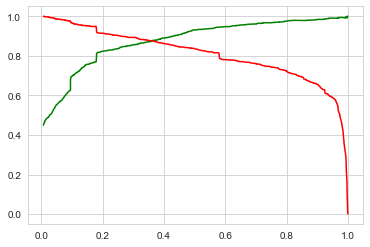

In [174]:
p, r, thresholds = precision_recall_curve(y_pred_df.Converted, y_pred_df.Converted_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Classification Report

In [175]:
print(classification_report(y_pred_df.Converted, y_pred_df.final_predicted))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92      1660
           1       0.86      0.89      0.87      1067

    accuracy                           0.90      2727
   macro avg       0.89      0.90      0.90      2727
weighted avg       0.90      0.90      0.90      2727



#### Plotting the ROC Curve for Test Dataset

In [176]:

fpr, tpr, thresholds = metrics.roc_curve( y_pred_df.Converted, y_pred_df.Converted_Prob, drop_intermediate = False )

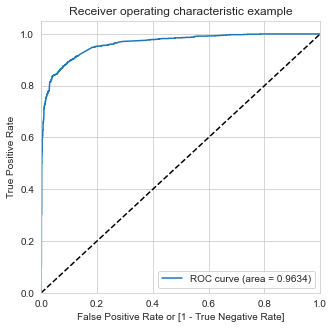

In [177]:
draw_roc(y_pred_df.Converted, y_pred_df.Converted_Prob)

#### Calculating the Area Under the Curve(GINI)

In [178]:
auc = auc_val(fpr,tpr)
auc

0.963376373347185

## Conclusion :

- While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the
  optimal cut off based on Sensitivity and Specificity for calculating the final prediction.
- Accuracy, Sensitivity and Specificity values of test set are around 90.0%, 89.3% and 90.4% which are approximately closer to 
  the respective values calculated using training dataset (89.6%, 89.2% and 89.8%).
- Also the lead score calculated in the training set of data shows the conversion rate on the final predicted model is 
  around 92%
- Hence overall this model seems to be good.  

### 1. Which are the top three variables in your model which contribute most towards the probability of a lead getting converted? 

Selecting the coefficients of the selected features from our final model excluding the intercept

In [179]:
pd.options.display.float_format = '{:.2f}'.format
selected_feature = res.params[1:]
selected_feature

Do Not Email                                   -1.36
Total Time Spent on Website                     1.09
Lead Source_Olark Chat                          1.12
Lead Source_Reference                           2.02
Lead Source_Welingak Website                    6.80
Last Activity_Email Opened                      0.73
Specialization_Travel and Tourism              -0.91
What is your current occupation_Unemployed     -0.78
Tags_Closed by Horizzon                         8.83
Tags_Not Mentioned                              3.04
Tags_Other_Tags                                 3.05
Tags_Will revert after reading the email        7.07
Last Notable Activity_Other_Notable_Activity    1.37
Last Notable Activity_SMS Sent                  2.58
dtype: float64

In [180]:
# Getting a relative coeffient value for all the features wrt the feature with the highest coefficient

feature_importance = selected_feature
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Do Not Email                                   -15.37
Total Time Spent on Website                     12.35
Lead Source_Olark Chat                          12.68
Lead Source_Reference                           22.92
Lead Source_Welingak Website                    77.06
Last Activity_Email Opened                       8.29
Specialization_Travel and Tourism              -10.27
What is your current occupation_Unemployed      -8.79
Tags_Closed by Horizzon                        100.00
Tags_Not Mentioned                              34.43
Tags_Other_Tags                                 34.54
Tags_Will revert after reading the email        80.12
Last Notable Activity_Other_Notable_Activity    15.57
Last Notable Activity_SMS Sent                  29.18
dtype: float64

In [181]:
# Sorting the feature variables based on their relative coefficient values

sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Do Not Email                                     0
Total Time Spent on Website                      6
Lead Source_Olark Chat                           7
Lead Source_Reference                            5
Lead Source_Welingak Website                     1
Last Activity_Email Opened                       2
Specialization_Travel and Tourism               12
What is your current occupation_Unemployed       3
Tags_Closed by Horizzon                         13
Tags_Not Mentioned                               9
Tags_Other_Tags                                 10
Tags_Will revert after reading the email         4
Last Notable Activity_Other_Notable_Activity    11
Last Notable Activity_SMS Sent                   8
dtype: int64

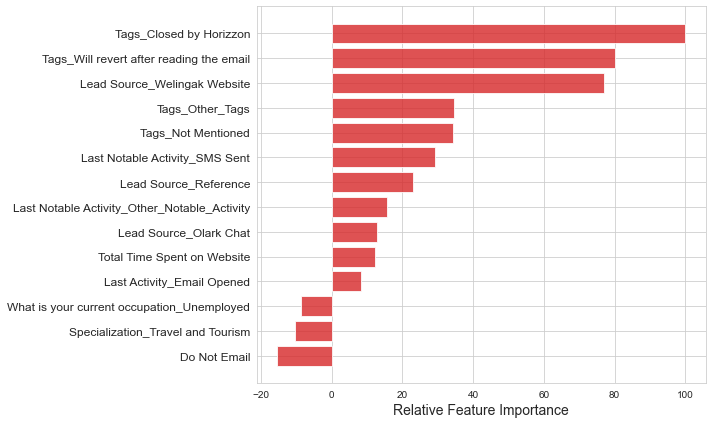

In [182]:
# Plot showing the feature variables based on their relative coefficient values

pos = np.arange(sorted_idx.shape[0]) + .5

fig = plt.figure(figsize=(10,6))
fx = fig.add_subplot(1, 1, 1)
fx.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:red',alpha=0.8)
fx.set_yticks(pos)
fx.set_yticklabels(np.array(X_train[col].columns)[sorted_idx], fontsize=12)
fx.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()

In [183]:
# Top 3 feature contributing the most

pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(3)

,index,0
8,Tags_Closed by Horizzon,100.00
11,Tags_Will revert after reading the email,80.12
4,Lead Source_Welingak Website,77.06


In [184]:
# Summary for the selected logistic regression model (Model - 7)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6348
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1533.4
Date:                Sun, 11 Apr 2021   Deviance:                       3066.9
Time:                        22:29:42   Pearson chi2:                 7.01e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -4.6715      0.309    -15.097      0.000      -5.278      -4.065
Do Not Email                                    -1.3573      0.223     -6.074      0.000      -1.795      -0.919
Total Time Spent on Website                      1.0909      0.054     20.279      0.000       0.985       1.196
Lead Source_Olark Chat                           1.1193      0.132      8.460      0.000       0.860       1.379
Lead Source_Reference                            2.0237      0.356      5.689      0.000       1.326       2.721
Lead Source_Welingak Website                     6.8043      1.027      6.626      0.000       4.792       8.817
Last Activity_Email Opened                       0.7321      0.114      6.445      0.000       0.509       0.955
Specialization_Travel and Tourism               -0.9068      0.401     -2.260      0.024      -1.693      -0.120
What is your current occupation_Unemployed      -0.7761      0.244     -3.184      0.001      -1.254      -0.298
Tags_Closed by Horizzon                          8.8298      0.751     11.757      0.000       7.358      10.302
Tags_Not Mentioned                               3.0398      0.198     15.357      0.000       2.652       3.428
Tags_Other_Tags                                  3.0496      0.208     14.684      0.000       2.643       3.457
Tags_Will revert after reading the email         7.0742      0.246     28.728      0.000       6.592       7.557
Last Notable Activity_Other_Notable_Activity     1.3747      0.413      3.325      0.001       0.564       2.185
Last Notable Activity_SMS Sent                   2.5763      0.129     20.012      0.000       2.324       2.829
================================================================================================================
"""

### Conclusion : 
1. Following are the variables that contributed the most: 

Tags_Closed by Horizzon

Tags_Will revert after reading the email

Lead Source_Welingak Website	

#### Following are the categorical variables that we covered above: 'Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'Tags', 'City', 'Last Notable Activity']

2. Following are the categorical/dummy variables that should be focused the most in order to increase the probability of lead conversion:
    
•	Tags_Closed by Horizzon (from Tags)

•	Tags_Will revert after reading the email (from Tags)

•	Lead Source_Welingak Website (from Lead Source)

In [185]:
y_train_pred_df.head(30)

,Converted,Converted_Prob,LeadId,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,0,0.10,302,0,1,1,0,0,0,0,0,0,0,0,0,10
1,0,0.03,6087,0,1,0,0,0,0,0,0,0,0,0,0,3
2,0,0.15,1033,0,1,1,0,0,0,0,0,0,0,0,0,15
3,0,0.01,7656,0,1,0,0,0,0,0,0,0,0,0,0,1
4,1,0.99,3241,1,1,1,1,1,1,1,1,1,1,1,1,99
5,0,0.07,5738,0,1,0,0,0,0,0,0,0,0,0,0,7
6,0,0.01,7366,0,1,0,0,0,0,0,0,0,0,0,0,1
7,0,0.04,3680,0,1,0,0,0,0,0,0,0,0,0,0,4
8,1,0.99,4170,1,1,1,1,1,1,1,1,1,1,1,1,99
9,0,0.10,43,0,1,0,0,0,0,0,0,0,0,0,0,10
